In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Q1. Use the k-means algorithm to cluster the following 8 examples into 3 clusters using pen and paper. In place of pen and paper, you can write the code without using any in- built function.

In [2]:
data = [(2,1), (2,5), (8,4), (5,8), (7,5), (6,4), (1,2), (4,9)]
data = pd.DataFrame(data)

In [3]:
X = data.values

/Users/volkopat/opt/anaconda3/envs/py2/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


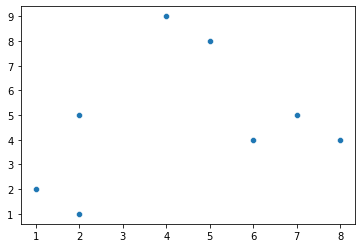

In [4]:
sns.scatterplot(X[:,0], X[:, 1])
plt.show()

In [5]:
def WCSS(X, centroids, cluster):
    sum = 0
    for i, val in enumerate(X):
        sum += np.sqrt((centroids[int(cluster[i]), 0] - val[0]) ** 2 + (centroids[int(cluster[i]), 1] - val[1]) ** 2)
    
    return sum

In [6]:
def KMeans(X, k):
    diff = 1
    cluster = np.zeros(data.shape[0])
    centroids = data.sample(n = k).values
    while diff:
        for i, row in enumerate(X):
            minimum_distance = float('inf')
            for idx, centroid in enumerate(centroids):
                distance = np.sqrt((centroid[0] - row[0]) ** 2 + (centroid[1] - row[1]) ** 2)
                if minimum_distance > distance:
                    minimum_distance = distance
                    cluster[i] = idx
        new_centroids = pd.DataFrame(X).groupby(by = cluster).mean().values
        if np.count_nonzero(centroids - new_centroids) == 0:
            diff = 0
        else:
            centroids = new_centroids
    return centroids, cluster

In [7]:
# Elbow method to find a good K value:

cost_list = []
for k in range(1, 8):
    centroids, cluster = KMeans(X, k)
    cost = WCSS(X, centroids, cluster)
    cost_list.append(cost)

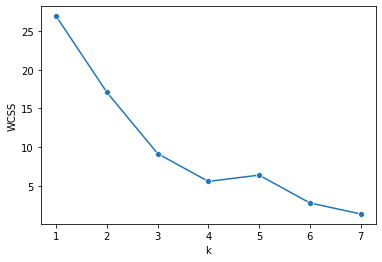

In [8]:
sns.lineplot(x = range(1, 8), y=cost_list, marker='o')
plt.xlabel('k')
plt.ylabel('WCSS')
plt.show()

/Users/volkopat/opt/anaconda3/envs/py2/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/Users/volkopat/opt/anaconda3/envs/py2/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


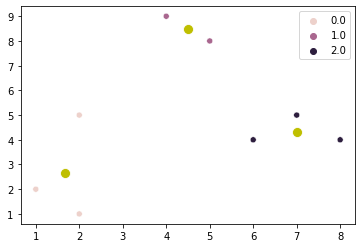

In [28]:
centroids, cluster = KMeans(X, k = 3)
sns.scatterplot(X[:,0], X[:, 1], hue = cluster)
sns.scatterplot(centroids[:,0], centroids[:, 1], s = 100, color = 'y')
plt.show()

## Q2. Apply RNN and LSTM for the stock price prediction. Compare and contrast their performance. You can optimize the architectures in terms of hyper-parameters such as no. of layers, epochs, learning rate, etc for better understanding and report your observations. Report your findings such as which architecture is best and why, what happened when you have changed the hyper-parameters, accuracy, error, etc. You are free to use any dataset of decent size of your choice.


In [41]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [74]:
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LSTM, SimpleRNN

In [31]:
input_file = "MSFT_data.csv"

In [43]:
dataset = pd.read_csv(input_file, header = [0], index_col = None, delimiter=',')

In [47]:
dataset['date'] = pd.to_datetime(dataset.date, format='%Y-%m-%d')
dataset.index = dataset['date']
dataset = dataset.sort_index(ascending = True, axis = 0)

In [48]:
dataset2 = pd.DataFrame(index = range(0, len(dataset)), columns=['date', 'close'])
for i in range(0, len(dataset)):
    dataset2['date'][i] = dataset['date'][i]
    dataset2['close'][i] = dataset['close'][i]

In [49]:
dataset2.index = dataset2.date
dataset2.drop('date', axis = 1, inplace = True)

In [52]:
dataset3 = dataset2.values 

In [60]:
train = dataset3[0:800, :]
valid = dataset3[800:, :]

In [63]:
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(dataset3)

x_train, y_train = [], []
for i in range(60, len(train)):
    x_train.append(scaled_data[i-60:i,0])
    y_train.append(scaled_data[i,0])
x_train, y_train = np.array(x_train), np.array(y_train)

x_train = np.reshape(x_train, (x_train.shape[0],x_train.shape[1],1))

### LSTM

In [64]:
model = Sequential()

model.add(LSTM(units = 50, return_sequences = True, input_shape=(x_train.shape[1], 1)))
model.add(Dropout(0.2))
model.add(LSTM(units = 50,return_sequences = True))
model.add(Dropout(0.2))
model.add(LSTM(units = 50,return_sequences = True))
model.add(Dropout(0.2))
model.add(LSTM(units = 50))
model.add(Dropout(0.2))
model.add(Dense(units = 1))
model.compile(optimizer = 'adam',loss = 'mean_squared_error')
model.fit(x_train, y_train, epochs = 10,batch_size = 32)

Train on 740 samples
Epoch 1/10


2022-05-03 13:33:30.374137: W tensorflow/core/grappler/optimizers/implementation_selector.cc:310] Skipping optimization due to error while loading function libraries: Invalid argument: Functions '__inference___backward_standard_lstm_58082_58567' and '__inference___backward_standard_lstm_58082_58567_specialized_for_StatefulPartitionedCall_3_at___inference_distributed_function_58692' both implement 'lstm_0f8aa7b1-c6b1-4980-8da6-ecac9ff64782' but their signatures do not match.


740/740 [==============================] - 21s 28ms/sample - loss: 0.0109
Epoch 2/10
740/740 [==============================] - 11s 15ms/sample - loss: 0.0023
Epoch 3/10
740/740 [==============================] - 11s 15ms/sample - loss: 0.0017
Epoch 4/10
740/740 [==============================] - 12s 16ms/sample - loss: 0.0016
Epoch 5/10
740/740 [==============================] - 11s 15ms/sample - loss: 0.0014
Epoch 6/10
740/740 [==============================] - 11s 15ms/sample - loss: 0.0013
Epoch 7/10
740/740 [==============================] - 12s 16ms/sample - loss: 0.0012
Epoch 8/10
740/740 [==============================] - 12s 16ms/sample - loss: 0.0015
Epoch 9/10
740/740 [==============================] - 11s 15ms/sample - loss: 0.0012
Epoch 10/10
740/740 [==============================] - 12s 16ms/sample - loss: 0.0011


In [66]:
inputs = dataset3[len(dataset3) - len(valid) - 60:]
inputs = inputs.reshape(-1, 1)
inputs  = scaler.transform(inputs)

In [67]:
x_test = []
for i in range(60, inputs.shape[0]):
    x_test.append(inputs[i - 60:i, 0])
x_test = np.array(x_test)

In [68]:
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))
closing_price = model.predict(x_test)
closing_price = scaler.inverse_transform(closing_price)

2022-05-03 13:37:09.402753: W tensorflow/core/grappler/optimizers/implementation_selector.cc:310] Skipping optimization due to error while loading function libraries: Invalid argument: Functions '__inference_standard_lstm_60347' and '__inference_standard_lstm_60347_specialized_for_sequential_6_lstm_24_StatefulPartitionedCall_at___inference_distributed_function_61120' both implement 'lstm_947bd92a-e6a9-4368-96f6-1f775487c9da' but their signatures do not match.


/Users/volkopat/opt/anaconda3/envs/py2/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


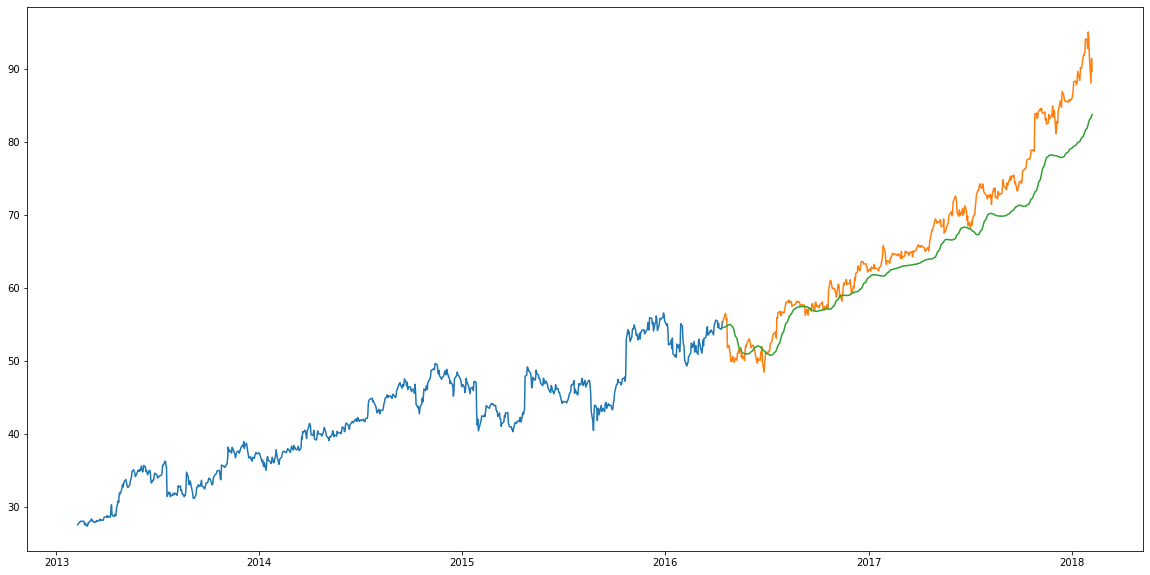

In [73]:
train = dataset2[:800]
valid = dataset2[800:]
valid['Predictions'] = closing_price
plt.figure(figsize = (20,10))
plt.plot(train['close'])
plt.plot(valid[['close','Predictions']])

### RNN

In [88]:
model = Sequential()

model.add(SimpleRNN(units = 50, return_sequences = True))
model.add(SimpleRNN(units = 50, return_sequences = True))
model.add(SimpleRNN(units = 50, return_sequences = True))
model.add(SimpleRNN(units = 50))
model.add(Dense(units = 1))
model.compile(optimizer = 'adam',loss = 'mean_squared_error')
model.fit(x_train, y_train, epochs = 10, batch_size = 32)

Train on 740 samples
Epoch 1/10
740/740 [==============================] - 9s 12ms/sample - loss: 0.0891
Epoch 2/10
740/740 [==============================] - 6s 8ms/sample - loss: 0.0051
Epoch 3/10
740/740 [==============================] - 6s 8ms/sample - loss: 8.8063e-04
Epoch 4/10
740/740 [==============================] - 6s 8ms/sample - loss: 4.0891e-04
Epoch 5/10
740/740 [==============================] - 6s 7ms/sample - loss: 3.8807e-04
Epoch 6/10
740/740 [==============================] - 6s 7ms/sample - loss: 3.8021e-04
Epoch 7/10
740/740 [==============================] - 5s 7ms/sample - loss: 3.7497e-04
Epoch 8/10
740/740 [==============================] - 5s 7ms/sample - loss: 3.5236e-04
Epoch 9/10
740/740 [==============================] - 6s 8ms/sample - loss: 4.2276e-04
Epoch 10/10
740/740 [==============================] - 6s 7ms/sample - loss: 3.6823e-04


In [89]:
closing_price = model.predict(x_test)
closing_price = scaler.inverse_transform(closing_price)

/Users/volkopat/opt/anaconda3/envs/py2/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


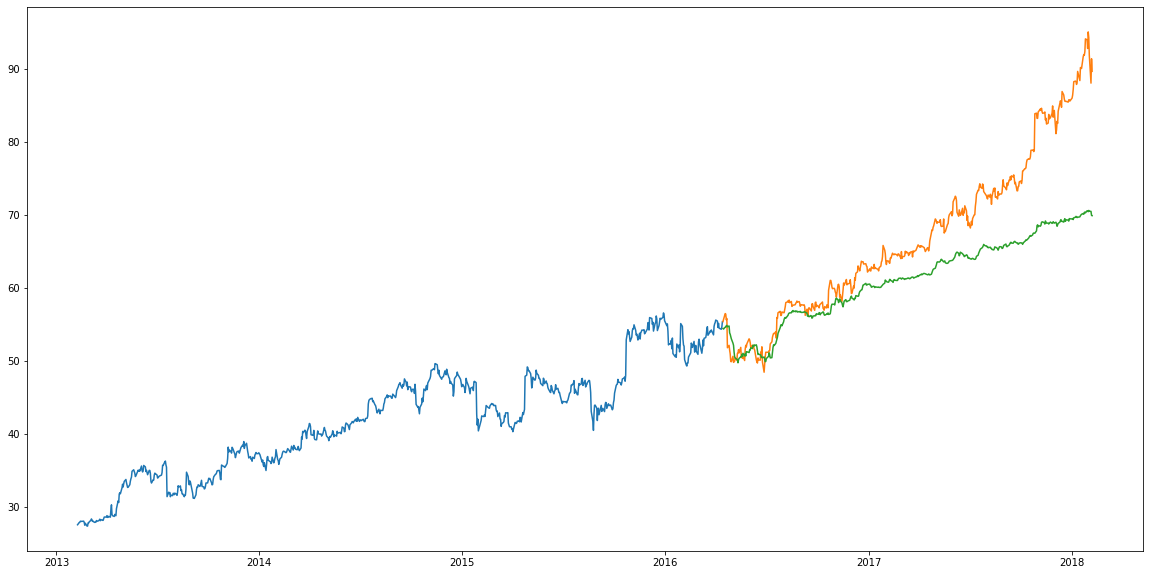

In [90]:
train = dataset2[:800]
valid = dataset2[800:]
valid['Predictions'] = closing_price
plt.figure(figsize = (20,10))
plt.plot(train['close'])
plt.plot(valid[['close','Predictions']])

## Changing Optimizer to RMSProp and Units to 32

### LSTM

In [91]:
model = Sequential()

model.add(LSTM(units = 32, return_sequences = True, input_shape=(x_train.shape[1], 1)))
model.add(Dropout(0.2))
model.add(LSTM(units = 32,return_sequences = True))
model.add(Dropout(0.2))
model.add(LSTM(units = 32,return_sequences = True))
model.add(Dropout(0.2))
model.add(LSTM(units = 32))
model.add(Dropout(0.2))
model.add(Dense(units = 1))
model.compile(optimizer = 'rmsprop',loss = 'mean_squared_error')
model.fit(x_train, y_train, epochs = 10,batch_size = 32)

Train on 740 samples
Epoch 1/10


2022-05-03 14:31:15.110320: W tensorflow/core/grappler/optimizers/implementation_selector.cc:310] Skipping optimization due to error while loading function libraries: Invalid argument: Functions '__inference___backward_standard_lstm_94016_94501' and '__inference___backward_standard_lstm_94016_94501_specialized_for_StatefulPartitionedCall_2_at___inference_distributed_function_95306' both implement 'lstm_6e890e20-f743-43df-a666-46586ad920e7' but their signatures do not match.


740/740 [==============================] - 17s 23ms/sample - loss: 0.0072
Epoch 2/10
740/740 [==============================] - 10s 13ms/sample - loss: 0.0037
Epoch 3/10
740/740 [==============================] - 9s 13ms/sample - loss: 0.0029
Epoch 4/10
740/740 [==============================] - 9s 12ms/sample - loss: 0.0025
Epoch 5/10
740/740 [==============================] - 9s 13ms/sample - loss: 0.0026
Epoch 6/10
740/740 [==============================] - 9s 12ms/sample - loss: 0.0024
Epoch 7/10
740/740 [==============================] - 9s 13ms/sample - loss: 0.0020
Epoch 8/10
740/740 [==============================] - 9s 12ms/sample - loss: 0.0021
Epoch 9/10
740/740 [==============================] - 9s 12ms/sample - loss: 0.0020
Epoch 10/10
740/740 [==============================] - 9s 13ms/sample - loss: 0.0018


In [92]:
closing_price = model.predict(x_test)
closing_price = scaler.inverse_transform(closing_price)

2022-05-03 14:33:19.329981: W tensorflow/core/grappler/optimizers/implementation_selector.cc:310] Skipping optimization due to error while loading function libraries: Invalid argument: Functions '__inference_standard_lstm_96491_specialized_for_sequential_11_lstm_27_StatefulPartitionedCall_at___inference_distributed_function_97734' and '__inference_cudnn_lstm_with_fallback_96602' both implement 'lstm_9f87a082-c0f9-4aca-8dc6-dc5ae885bc2d' but their signatures do not match.


/Users/volkopat/opt/anaconda3/envs/py2/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


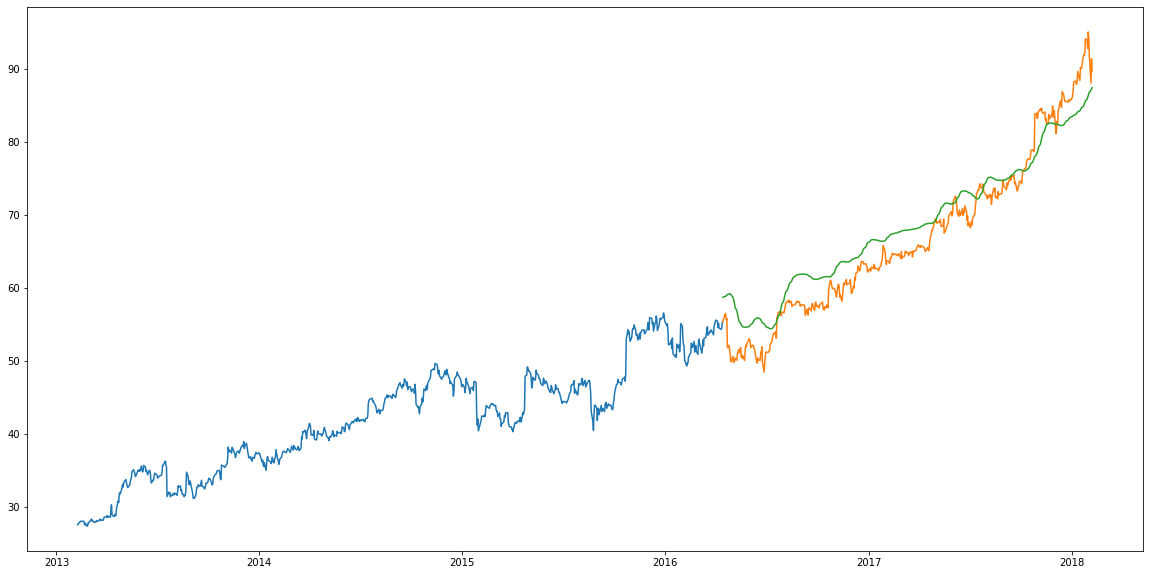

In [93]:
train = dataset2[:800]
valid = dataset2[800:]
valid['Predictions'] = closing_price
plt.figure(figsize = (20,10))
plt.plot(train['close'])
plt.plot(valid[['close','Predictions']])

### RNN

In [94]:
model = Sequential()

model.add(SimpleRNN(units = 32, return_sequences = True))
model.add(SimpleRNN(units = 32, return_sequences = True))
model.add(SimpleRNN(units = 32, return_sequences = True))
model.add(SimpleRNN(units = 32))
model.add(Dense(units = 1))
model.compile(optimizer = 'rmsprop',loss = 'mean_squared_error')
model.fit(x_train, y_train, epochs = 10, batch_size = 32)

Train on 740 samples
Epoch 1/10
740/740 [==============================] - 6s 8ms/sample - loss: 0.0519
Epoch 2/10
740/740 [==============================] - 2s 3ms/sample - loss: 0.0130 1s
Epoch 3/10
740/740 [==============================] - 3s 4ms/sample - loss: 0.0122
Epoch 4/10
740/740 [==============================] - 3s 4ms/sample - loss: 0.0151
Epoch 5/10
740/740 [==============================] - 3s 4ms/sample - loss: 0.0086
Epoch 6/10
740/740 [==============================] - 3s 4ms/sample - loss: 0.0088
Epoch 7/10
740/740 [==============================] - 3s 4ms/sample - loss: 0.0086
Epoch 8/10
740/740 [==============================] - 3s 4ms/sample - loss: 0.0077
Epoch 9/10
740/740 [==============================] - 3s 4ms/sample - loss: 0.0074
Epoch 10/10
740/740 [==============================] - 3s 4ms/sample - loss: 0.0064


In [95]:
closing_price = model.predict(x_test)
closing_price = scaler.inverse_transform(closing_price)

/Users/volkopat/opt/anaconda3/envs/py2/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


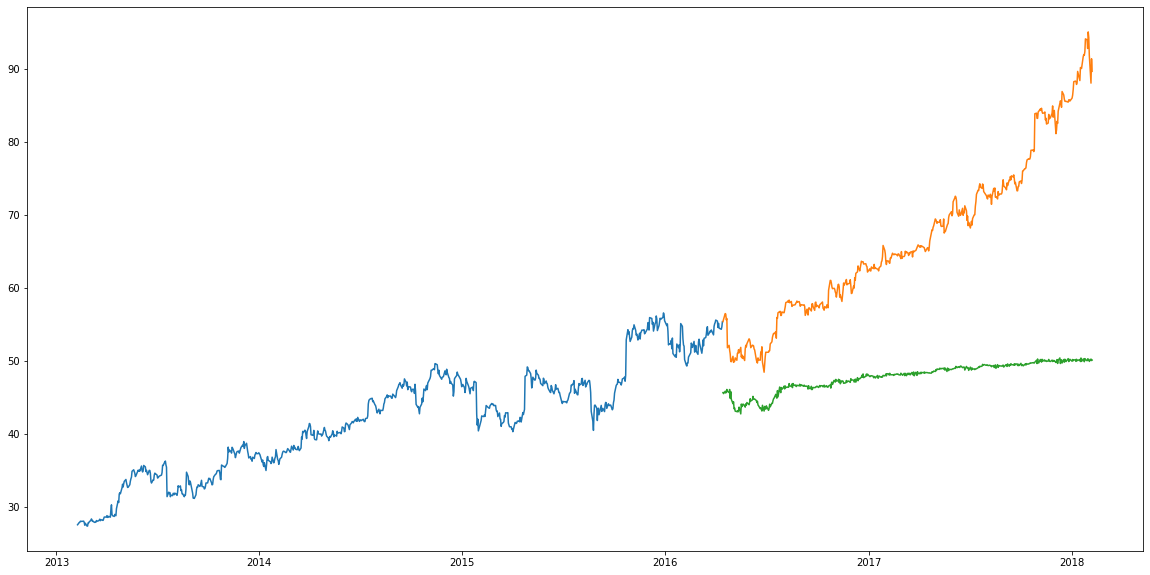

In [96]:
train = dataset2[:800]
valid = dataset2[800:]
valid['Predictions'] = closing_price
plt.figure(figsize = (20,10))
plt.plot(train['close'])
plt.plot(valid[['close','Predictions']])